In [1]:
%cd C:/Users/shrav/Data_Analysis_Projects/Big Projects/Project StarMart/Datasets

C:\Users\shrav\Data_Analysis_Projects\Big Projects\Project StarMart\Datasets


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Employees 
df = pd.read_csv("StarMart_Employees.csv")
df.head()

,emp_id,store_id,name,age,gender,ph_num,email,address,department,role,hourly_rate
0,STRMRT_EMP_1_1,STRMRT_STR_01,Levi Wilson,19,Male,+1(872)-206-6191,leviwilson@gmail.com,"0799 W Addison St, Lakeview, North Chicago",Store Management,Store Manager,23.58
1,STRMRT_EMP_1_2,STRMRT_STR_01,Jason Callahan,59,Male,+1(312)-971-9322,jasoncallahan@gmail.com,"123 N Elston Ave, Irving Park, North Chicago",Store Management,Assistant Manager,19.53
2,STRMRT_EMP_1_3,STRMRT_STR_01,Joseph Smith,24,Male,+1(872)-260-5555,josephsmith@gmail.com,"7941 N Clark St, Lincoln Park, North Chicago",Store Management,Department Supervisor,23.58
3,STRMRT_EMP_1_4,STRMRT_STR_01,Paula Gibson,26,Female,+1(312)-575-3747,paulagibson@gmail.com,"180 N Broadway, Edgewater, North Chicago",Sales Floor,Sales Associate,17.13
4,STRMRT_EMP_1_5,STRMRT_STR_01,Nancy Juarez,60,Female,+1(312)-584-4890,nancyjuarez@gmail.com,"47017 W Foster Ave, Edgewater, North Chicago",Sales Floor,Sales Associate,17.13


In [4]:
df.describe().round(2)

,age,hourly_rate
count,1635.00,1635.00
mean,33.82,16.06
std,13.60,1.73
min,18.00,14.43
25%,23.00,15.00
50%,30.00,15.68
75%,41.00,16.93
max,70.00,23.58


In [5]:
df.describe(include='object')

,emp_id,store_id,name,gender,ph_num,email,address,department,role
count,1635,1635,1635,1635,1635,1635,1635,1635,1635
unique,1635,25,1615,2,1635,1623,1634,9,20
top,STRMRT_EMP_1_1,STRMRT_STR_01,Mary Taylor,Female,+1(872)-206-6191,davidjohnson@gmail.com,"738 W 87th St, Auburn Gresham, South Chicago",Inventory/Stock,Front-end Checkout Staff
freq,1,85,2,841,1,2,2,580,170


# Employee Per Store 

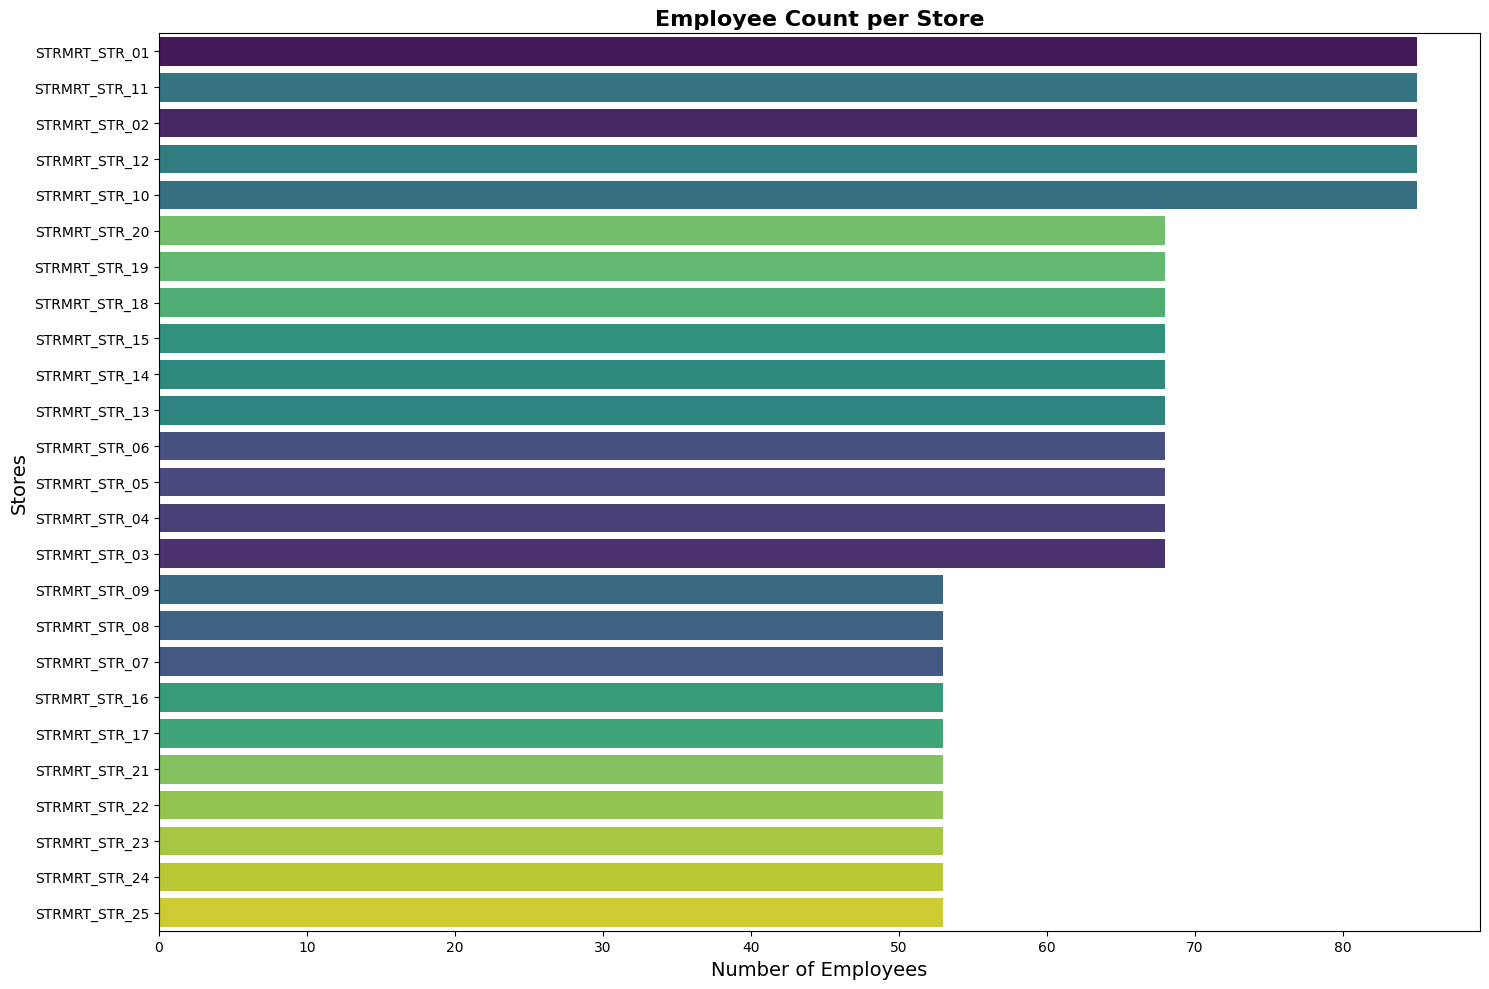

In [6]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='store_id', order=df["store_id"].value_counts().index, palette="viridis", hue='store_id')
plt.title("Employee Count per Store", fontsize=16, weight='bold')
plt.xlabel("Number of Employees", fontsize=14)
plt.ylabel("Stores", fontsize=14)
plt.tight_layout()
plt.show()

# Employee Count per Department 

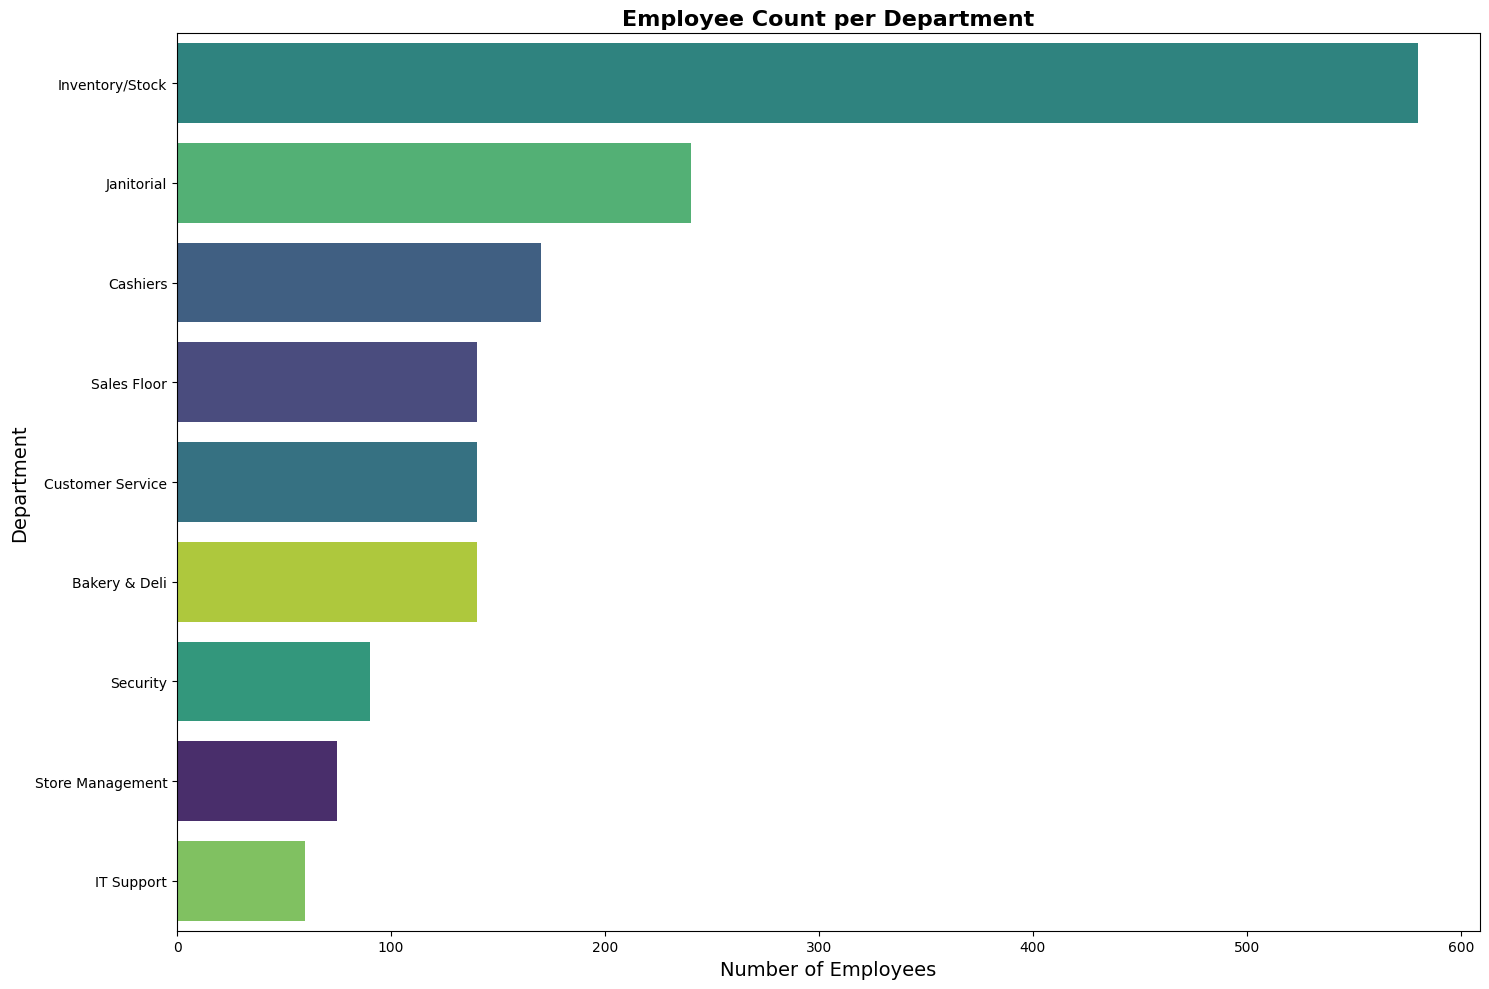

In [7]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='department', order=df["department"].value_counts().index, palette="viridis", hue='department')
plt.title("Employee Count per Department", fontsize=16, weight='bold')
plt.xlabel("Number of Employees", fontsize=14)
plt.ylabel("Department", fontsize=14)
plt.tight_layout()
plt.show()

# Employee Count per Role 

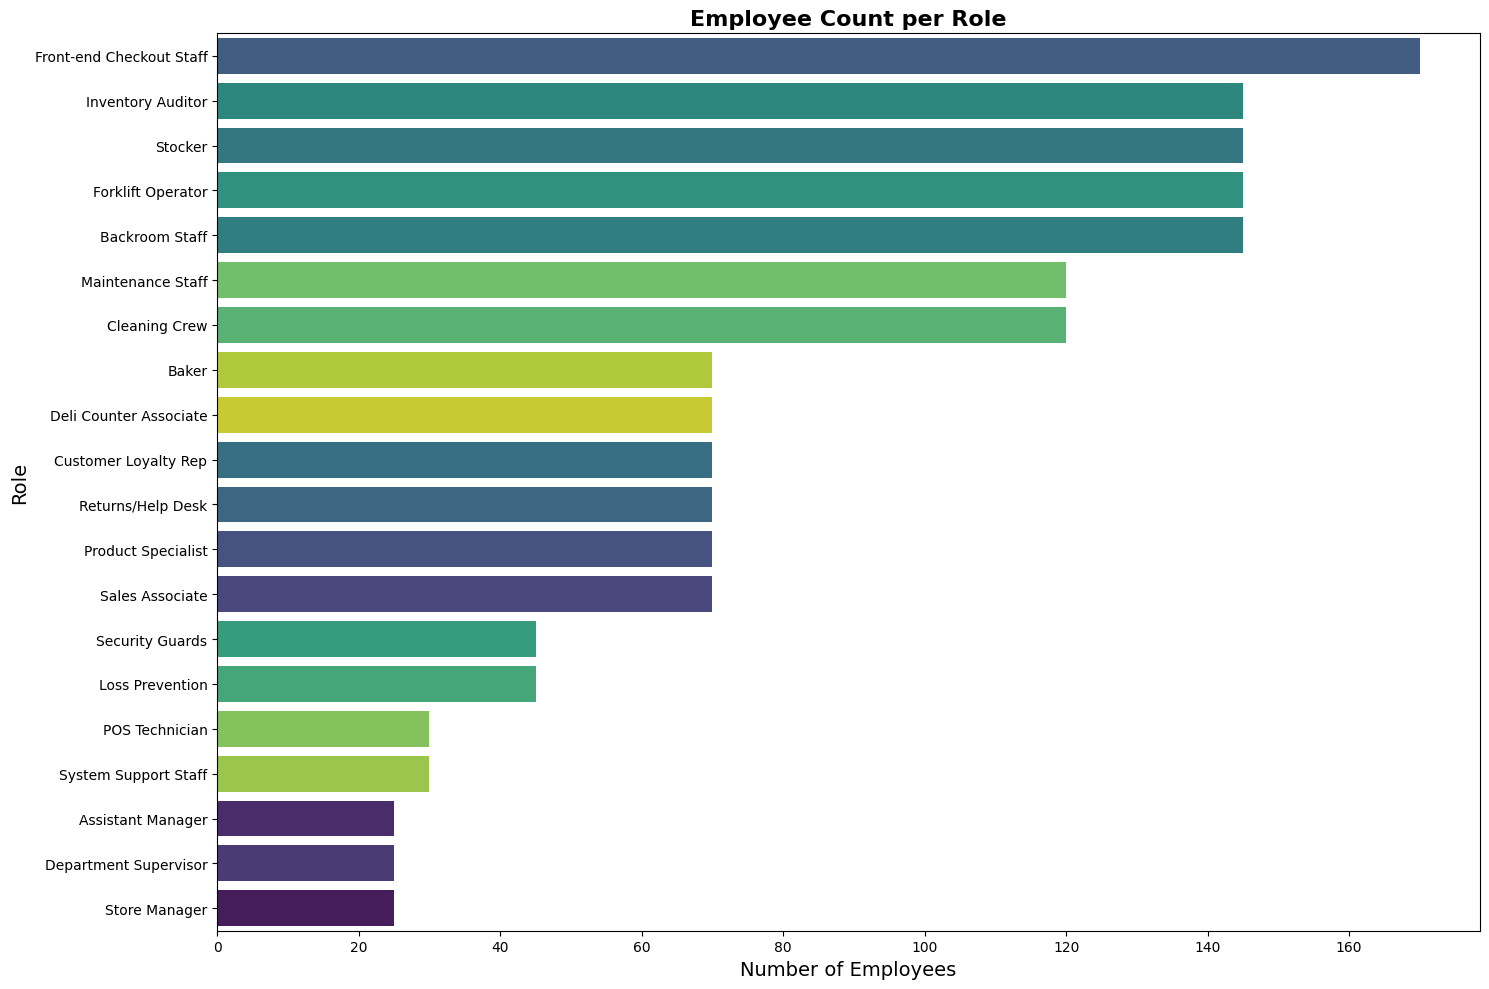

In [8]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='role', order=df["role"].value_counts().index, palette="viridis", hue='role')
plt.title("Employee Count per Role", fontsize=16, weight='bold')
plt.xlabel("Number of Employees", fontsize=14)
plt.ylabel("Role", fontsize=14)
plt.tight_layout()
plt.show()

# Avg Hourly Rate per Role

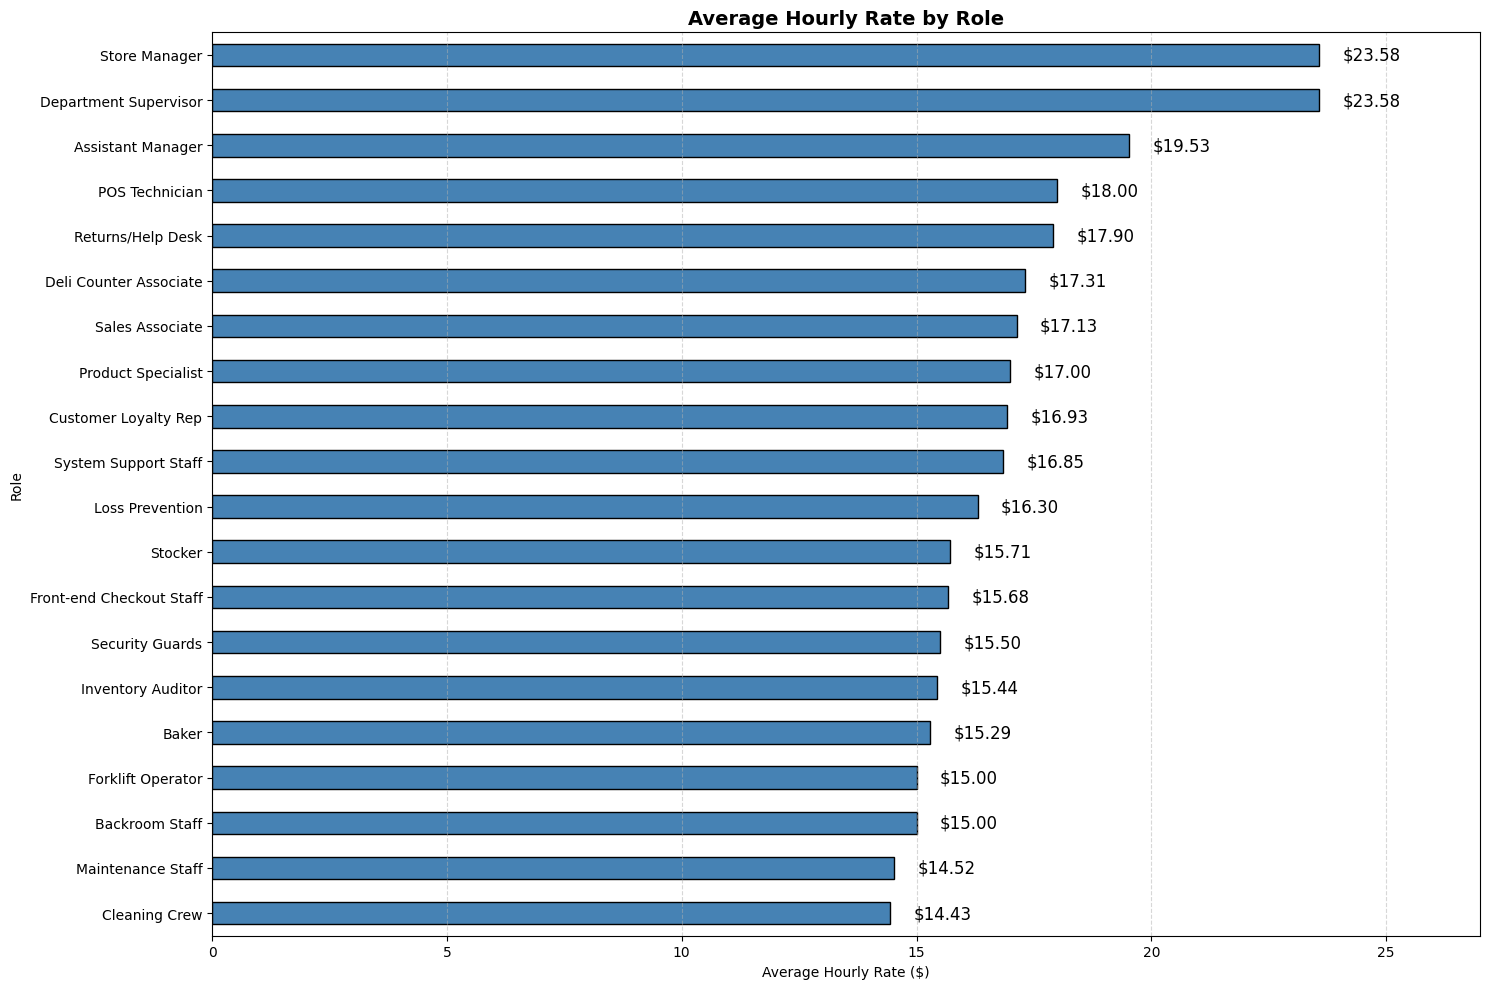

In [9]:
# Group by 'role' and get the average hourly rate
role_grp = df.groupby('role')['hourly_rate'].mean().sort_values()

# Plot horizontal bar chart
plt.figure(figsize=(15, 10))
role_grp.plot(kind='barh', color='steelblue', edgecolor='black')

plt.title("Average Hourly Rate by Role", fontsize=14, weight='bold')
plt.xlabel("Average Hourly Rate ($)")
plt.ylabel("Role")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xlim(0, 27)

# Annotate bars with values
for i, (value, label) in enumerate(zip(role_grp.values, role_grp.index)):
    plt.text(value + 0.5, i, f"${value:.2f}", va='center', fontsize=12)

plt.tight_layout()
plt.show()


# Gender Distribution

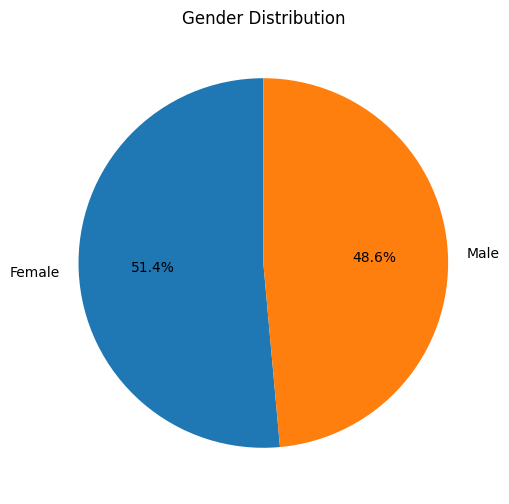

In [10]:
gender_counts = df['gender'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

# Age Distribution

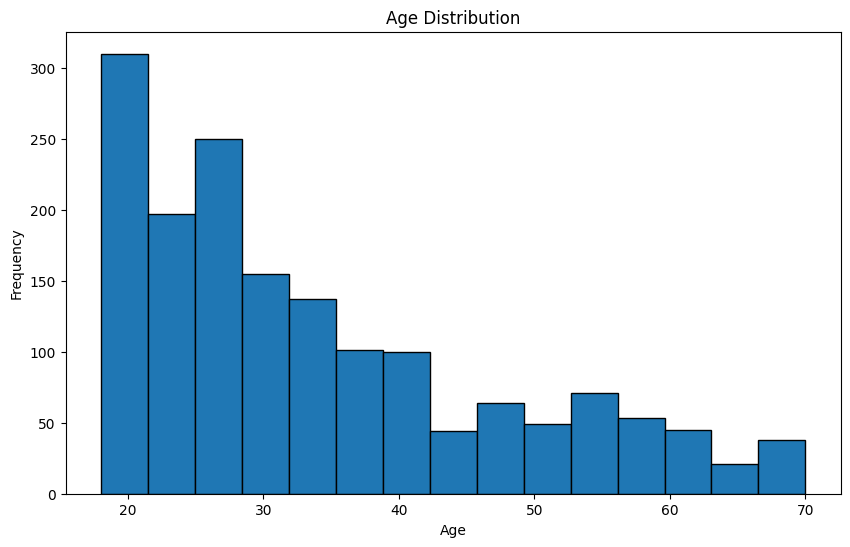

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=15, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [12]:
# character limit for SQL

object_cols = df.select_dtypes(include='object')

# Find value with max length in each column
max_length_values = {
    col: object_cols[col].loc[object_cols[col].str.len().idxmax()]
    for col in object_cols.columns
}

# Display results
for col, val in max_length_values.items():
    print(f"Column: {col}\nLength: {len(val)}\nValue: {val}\n{'-'*70}")

Column: emp_id
Length: 16
Value: STRMRT_EMP_10_10
----------------------------------------------------------------------
Column: store_id
Length: 13
Value: STRMRT_STR_01
----------------------------------------------------------------------
Column: name
Length: 25
Value: Mrs. Brandy Dominguez DDS
----------------------------------------------------------------------
Column: gender
Length: 6
Value: Female
----------------------------------------------------------------------
Column: ph_num
Length: 16
Value: +1(872)-206-6191
----------------------------------------------------------------------
Column: email
Length: 32
Value: mrs.brandydominguezdds@yahoo.com
----------------------------------------------------------------------
Column: address
Length: 60
Value: 14299 S Martin Luther King Jr Dr, Bronzeville, South Chicago
----------------------------------------------------------------------
Column: department
Length: 16
Value: Store Management
--------------------------------------------